In [ ]:

import pandas as pd
file_fallecidos = '/content/fallecidos_covid.csv'
file_positivos = '/content/positivos_covid.csv'
try:
    fallecidos_df = pd.read_csv(file_fallecidos, encoding='latin1')
    positivos_df = pd.read_csv(file_positivos, encoding='latin1')
    fallecidos_df.head(), positivos_df.head()
except Exception as e:
    str(e)


In [ ]:
fallecidos_df.head()

,UUID,FECHA_FALLECIMIENTO,EDAD_DECLARADA,SEXO,FECHA_NAC,DEPARTAMENTO,PROVINCIA,DISTRITO
0,a3f91b4893446f471ec1c079f28ba20b,20200602,1,MASCULINO,20190205.0,LIMA,LIMA,LA VICTORIA
1,8960c1b9f3c9289271b41c4a7c0d33f6,20200602,41,MASCULINO,19780811.0,LIMA,LIMA,VILLA EL SALVADOR
2,36497739152c2ae26703c1eca9acf537,20200602,72,MASCULINO,19471001.0,ANCASH,SANTA,NUEVO CHIMBOTE
3,627171bd69f18c257468bca6cb0aeff0,20200602,49,MASCULINO,19700910.0,ANCASH,SANTA,CHIMBOTE
4,2b20dcb481a39590c87752156e2a9e32,20200602,26,MASCULINO,19931017.0,LIMA,LIMA,LOS OLIVOS


In [ ]:
positivos_df.head()

,UUID,DEPARTAMENTO,PROVINCIA,DISTRITO,METODODX,EDAD,SEXO,FECHA_RESULTADO
0,7320cabdc1aaca6c59014cae76a134e6,AMAZONAS,BAGUA,BAGUA,PCR,47.0,MASCULINO,20200615
1,71ecb6bccb248b0bb2ac72ed51b5e979,AMAZONAS,BAGUA,BAGUA,PCR,15.0,FEMENINO,20200615
2,566af4276cbe9359abe93f9aa86396c3,AMAZONAS,BAGUA,BAGUA,PCR,88.0,MASCULINO,20200615
3,027561e9d126e7c283d79c02cede562d,AMAZONAS,BAGUA,BAGUA,PCR,73.0,MASCULINO,20200615
4,971f8e1295583756d81fe42f3318488c,AMAZONAS,BAGUA,BAGUA,PCR,4.0,FEMENINO,20200615


In [ ]:
print("Fallecidos Dataframe Info:")
print(fallecidos_df.info())
print("\nPositivos Dataframe Info:")
print(positivos_df.info())

Fallecidos Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26658 entries, 0 to 26657
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UUID                 26658 non-null  object 
 1   FECHA_FALLECIMIENTO  26658 non-null  int64  
 2   EDAD_DECLARADA       26658 non-null  int64  
 3   SEXO                 26658 non-null  object 
 4   FECHA_NAC            25389 non-null  float64
 5   DEPARTAMENTO         26658 non-null  object 
 6   PROVINCIA            25379 non-null  object 
 7   DISTRITO             25909 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.6+ MB
None

Positivos Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549321 entries, 0 to 549320
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   UUID             549321 non-null  object 
 1   DEPARTAMENTO   

In [ ]:
positives_by_department = positivos_df.groupby('DEPARTAMENTO').size().sort_values(ascending=False)
deaths_by_department = fallecidos_df.groupby('DEPARTAMENTO').size().sort_values(ascending=False)
print("\nTop 5 Departments by Positive Cases:")
print(positives_by_department.head())
print("\nTop 5 Departments by Deaths:")
print(deaths_by_department.head())


Top 5 Departments by Positive Cases:
DEPARTAMENTO
LIMA           250192
CALLAO          24946
PIURA           24693
AREQUIPA        24559
LIMA REGION     21415
dtype: int64

Top 5 Departments by Deaths:
DEPARTAMENTO
LIMA           11799
LA LIBERTAD     1959
PIURA           1755
LAMBAYEQUE      1555
CALLAO          1486
dtype: int64


In [ ]:
total_positives = positivos_df.shape[0]
total_deaths = fallecidos_df.shape[0]
print(f"\nTotal Positive Cases: {total_positives}")
print(f"Total Deaths: {total_deaths}")


Total Positive Cases: 549321
Total Deaths: 26658


In [ ]:

age_distribution_positives = positivos_df['EDAD'].describe()
age_distribution_deaths = fallecidos_df['EDAD_DECLARADA'].describe()

print("\nAge Distribution for Positive Cases:")
print(age_distribution_positives)
print("\nAge Distribution for Deaths:")
print(age_distribution_deaths)


Age Distribution for Positive Cases:
count    549247.000000
mean         43.150786
std          17.503261
min           0.000000
25%          30.000000
50%          42.000000
75%          55.000000
max         120.000000
Name: EDAD, dtype: float64

Age Distribution for Deaths:
count    26658.000000
mean        65.689737
std         14.131987
min          0.000000
25%         57.000000
50%         66.000000
75%         76.000000
max        107.000000
Name: EDAD_DECLARADA, dtype: float64


In [ ]:
gender_distribution_positives = positivos_df['SEXO'].value_counts()
gender_distribution_deaths = fallecidos_df['SEXO'].value_counts()

print("\nGender Distribution for Positive Cases:")
print(gender_distribution_positives)
print("\nGender Distribution for Deaths:")
print(gender_distribution_deaths)


Gender Distribution for Positive Cases:
SEXO
MASCULINO    300796
FEMENINO     248525
Name: count, dtype: int64

Gender Distribution for Deaths:
SEXO
MASCULINO    18764
FEMENINO      7894
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer


fallecidos_df['Survived'] = 0
positivos_df['Survived'] = 1


combined_df = pd.concat([positivos_df, fallecidos_df], ignore_index=True)
combined_df['SEXO'] = combined_df['SEXO'].map({'MASCULINO': 0, 'FEMENINO': 1})

features = combined_df[['EDAD', 'SEXO']]
target = combined_df['Survived']
imputer = SimpleImputer(strategy='mean')
features = imputer.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)



In [ ]:

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))




Accuracy: 0.953626862043821
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5342
           1       0.95      1.00      0.98    109854

    accuracy                           0.95    115196
   macro avg       0.48      0.50      0.49    115196
weighted avg       0.91      0.95      0.93    115196



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


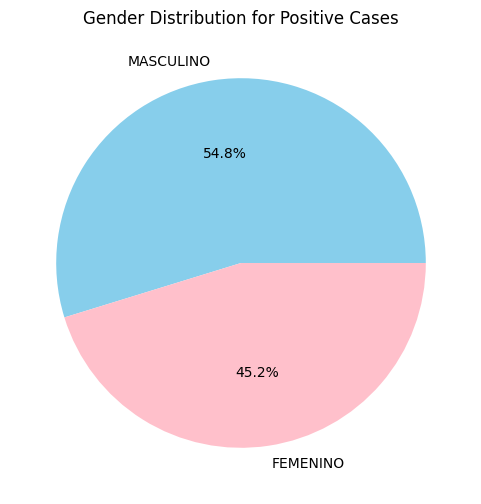

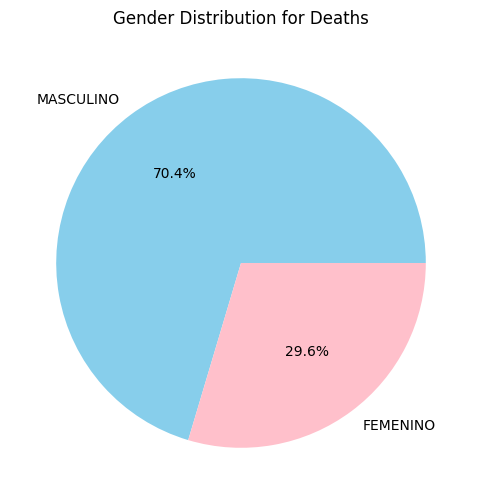

In [ ]:

gender_distribution_positives.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['skyblue', 'pink'])
plt.title('Gender Distribution for Positive Cases')
plt.ylabel('')
plt.show()

gender_distribution_deaths.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), colors=['skyblue', 'pink'])
plt.title('Gender Distribution for Deaths')
plt.ylabel('')
plt.show()
